In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

%matplotlib notebook

<IPython.core.display.Javascript object>


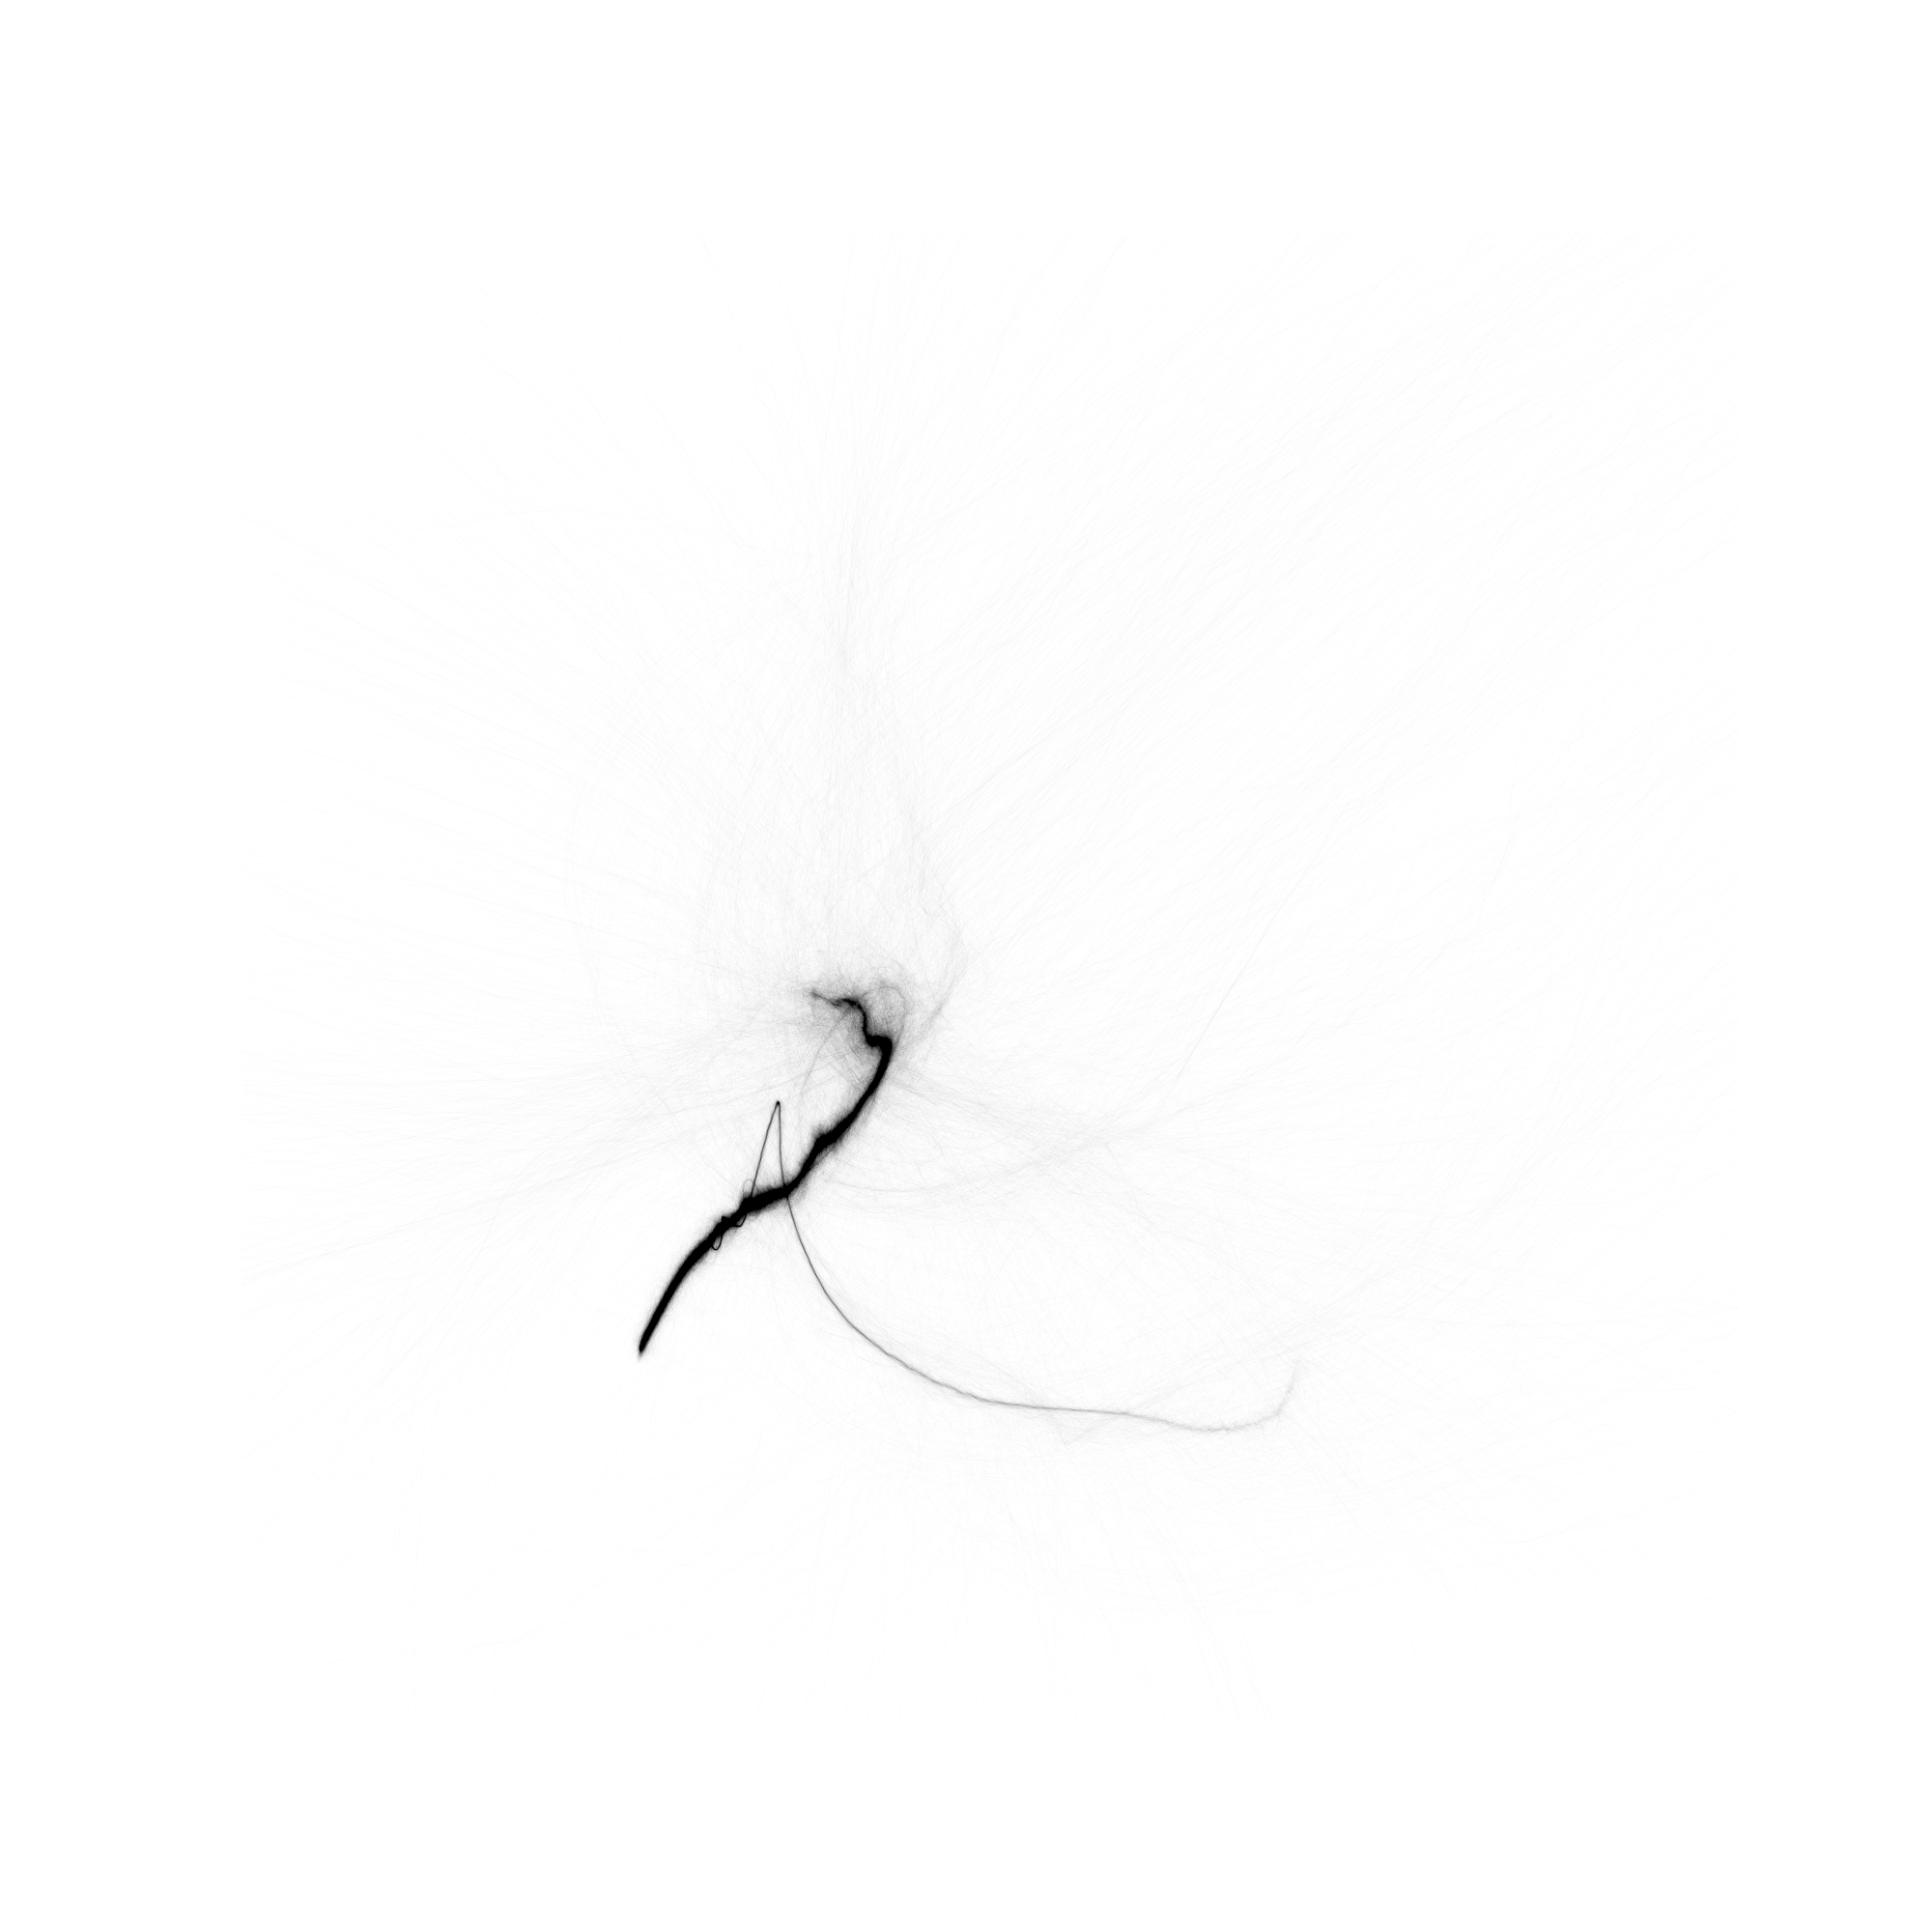

In [2]:
with open('EAGLE_MW_trace_coords.npy', 'rb') as f:
    coordinates = np.load(f)

fig = plt.figure()
ax = plt.axes(projection='3d')
fig.set_size_inches(10,10)
downsample = 10

mean = np.nanmean(coordinates.reshape(np.shape(coordinates)[0]*np.shape(coordinates)[1],np.shape(coordinates)[2]), axis=0)
X = coordinates[:,::downsample,0]-mean[0]
Y = coordinates[:,::downsample,1]-mean[1]
Z = coordinates[:,::downsample,2]-mean[2]


for i in range(np.shape(X)[1]): 
    ax.plot3D(X[:,i], Y[:,i], Z[:,i], color='Black', lw=0.01, alpha=0.2)
    
max_range = np.array([X.max()-X.min(), Y.max()-Y.min(), Z.max()-Z.min()]).max()
Xb = 0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][0].flatten() + 0.5*(X.max()+X.min())
Yb = 0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][1].flatten() + 0.5*(Y.max()+Y.min())
Zb = 0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][2].flatten() + 0.5*(Z.max()+Z.min())
for xb, yb, zb in zip(Xb, Yb, Zb):
    ax.plot([xb], [yb], [zb], 'w')


ax.set_axis_off()